In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [22]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [23]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [24]:
df.shape

(5572, 5)

In [25]:
df.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [26]:
x=df['v2']
y=df['v1']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.values)
X_test_count = v.transform(X_test)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
print(f"X_train shape : {X_train_count.shape}")
print(f"Y_train shape : {y_train.shape}")
print(f"X_test shape : {X_test_count.shape}")
print(f"Y_test shape : {y_test.shape}")

X_train shape : (4179, 7441)
Y_train shape : (4179,)
X_test shape : (1393, 7441)
Y_test shape : (1393,)


In [51]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [54]:
X_test_count=v.transform(X_test.values)
predicted=model.predict(X_test_count)
print(predicted)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


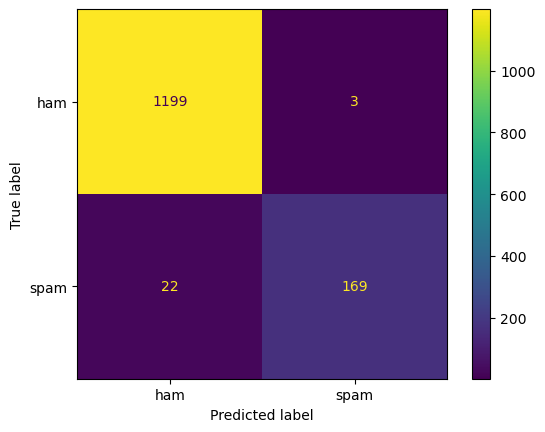

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,predicted)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1202
        spam       0.98      0.88      0.93       191

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [59]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted))

0.9820531227566404


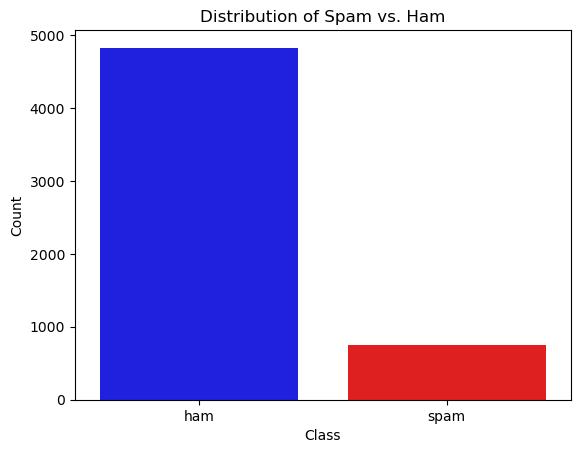

In [63]:
sns.countplot(x=y,hue=y,palette={'ham': 'blue', 'spam': 'red'},legend=False)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Spam vs. Ham")
plt.show()

In [67]:
#Hyper Parameter Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10, 100],'fit_prior': [True, False]}  # Trying different values for alpha
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid)
grid_search.fit(X_train_count, y_train)
print(grid_search.best_params_)  # Print the best alpha found


{'alpha': 1, 'fit_prior': True}


In [68]:
nb=grid_search.best_estimator_
y_pred=nb.predict(X_test_count)
accuracy_score(y_test,y_pred)

0.9820531227566404